## Assignment 8: Random Forest and AdaBoost Ensemble Techniques

### Name: Jahnavi Murali
### Reg No.: 3122 21 5001 038

### Learning Objective

- To familiarise ensemble techniques by changing training data i.e., bagging and boosting
- Use python scikit-learn library to train and test on breast cancer diagnosis data using random forest classifier and adaboost algortithm

### Imports

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve

### Loading dataset

In [2]:
df = pd.read_csv('data.csv')

### Preprocessing and EDA

In [3]:
# stats on numerical variables
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# encoding target categorical variable
# malignant - 1 and benign - 0
df = df.replace({'diagnosis': {'M': 1,
                                'B': 0}})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
# correlation matrix
correlation_matrix = df.corr().round(2)
correlation_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.00,0.04,0.07,0.10,0.07,0.10,-0.01,0.00,0.05,0.04,...,0.08,0.06,0.08,0.11,0.01,-0.00,0.02,0.04,-0.04,-0.03
diagnosis,0.04,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.07,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.10,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.07,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.10,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,-0.01,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.00,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.05,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.04,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37


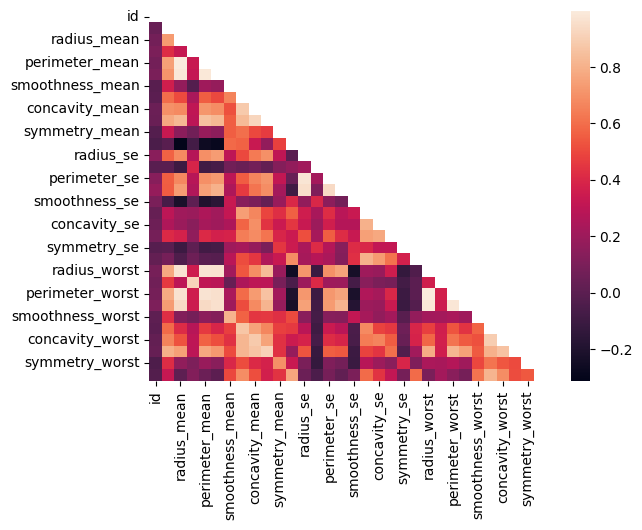

In [25]:
# correlation heat map
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(),mask=mask)

plt.show()

In [26]:
# standardising the df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

## Train-Test Split

In [27]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Random Forest Classifier - Bagging Ensemble Technique

Accuracy scores for 5 folds: [0.95       0.9375     0.9375     0.96202532 0.93670886]
Mean accuracy score: 0.944746835443038
Accuracy score on test data: 0.9415204678362573
Precision score on test data: 0.9491525423728814
Recall score on test data: 0.8888888888888888


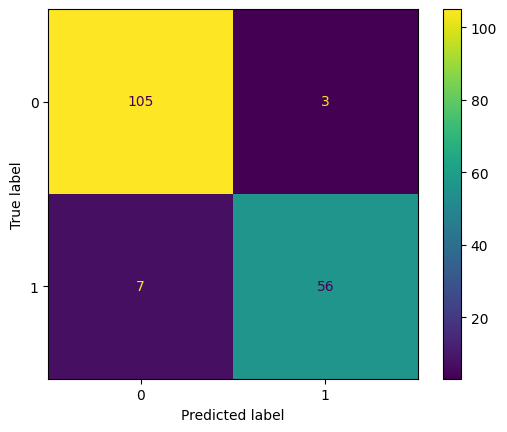

RandomForestClassifier(n_estimators=15, random_state=42)

In [29]:
model = RandomForestClassifier(n_estimators=15,random_state=42)
k = 5
scoring = 'accuracy'

#use k-fold cross validation to evaluate model on training data
scores = cross_val_score(model, X_train, y_train, cv=k, scoring=scoring)
print(f"Accuracy scores for {k} folds: {scores}")
print(f"Mean accuracy score: {np.mean(scores)}")

#use k-fold cross validation to generate predictions on test data
predictions = cross_val_predict(model, X_test, y_test, cv=k)
print(f"Accuracy score on test data: {accuracy_score(y_test, predictions)}")

#calculate precision and recall scores
print(f"Precision score on test data: {precision_score(y_test, predictions)}")
print(f"Recall score on test data: {recall_score(y_test, predictions)}")

#create and plot confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#print coefficients of the model
model.fit(X_train,y_train) #fit the model on the whole training data

#### Plotting ROC Curve

In [33]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.9948559670781894

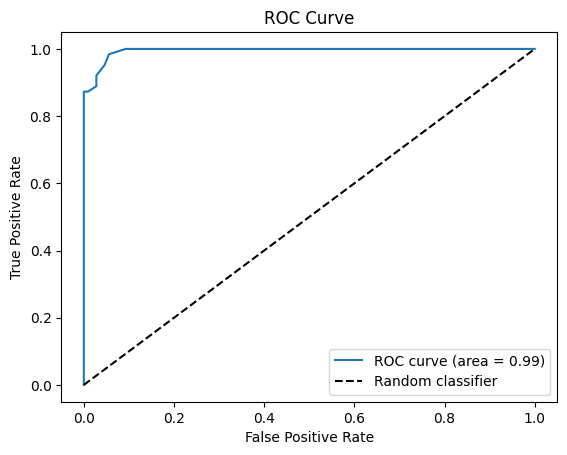

In [34]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Adaboost - Boosting Ensemble Technique

Accuracy scores for 5 folds: [0.975      0.95       0.95       0.92405063 0.93670886]
Mean accuracy score: 0.9471518987341773
Accuracy score on test data: 0.9473684210526315
Precision score on test data: 0.95
Recall score on test data: 0.9047619047619048


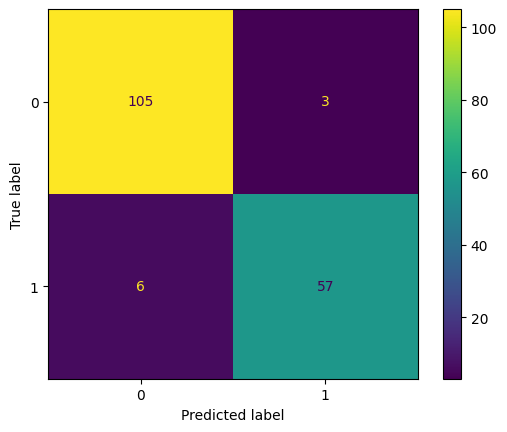

AdaBoostClassifier(n_estimators=5, random_state=42)

In [40]:

from sklearn.ensemble import AdaBoostClassifier
k = 5
scoring = 'accuracy'
clf = AdaBoostClassifier(n_estimators=5, random_state=42)
#use k-fold cross validation to evaluate model on training data
scores = cross_val_score(clf, X_train, y_train, cv=k, scoring=scoring)
print(f"Accuracy scores for {k} folds: {scores}")
print(f"Mean accuracy score: {np.mean(scores)}")


#use k-fold cross validation to generate predictions on test data
predictions = cross_val_predict(clf, X_test, y_test, cv=k)
print(f"Accuracy score on test data: {accuracy_score(y_test, predictions)}")

#calculate precision and recall scores
print(f"Precision score on test data: {precision_score(y_test, predictions)}")
print(f"Recall score on test data: {recall_score(y_test, predictions)}")

#create and plot confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#print coefficients of the model
clf.fit(X_train,y_train) #fit the model on the whole training data

In [41]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.9936067019400352

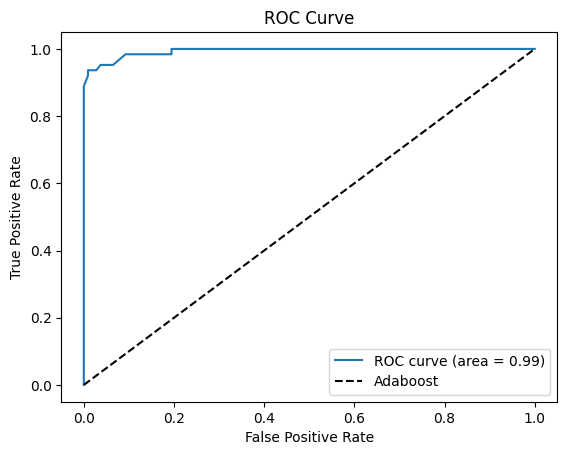

In [42]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Inference

- Both techniques seem to work well on this dataset
- As the number of estimators increase, the models begin to overfit, early stopping is required
- k fold cross validation has been applied to check if the model generalises well to unseen data

### Learning outcomes

- Ensemble techniques bagging (random forest classifier) and boosting (adaboost)
- Plotting ROC curves
- Preprocessing data through standardisation and one-hot encoding


### GitHub Repo link

https://github.com/jahnavimurali/ML-Assignments
